In [ ]:
!pip install cmake


In [ ]:
!pip install dlib==19.18.0

In [ ]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 115kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=786d37e3573601cf02f9792b5ae8d00a26018daf73fb28996cd648c18ef296cd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!pip install numpy

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow


[True] [0.32113925]


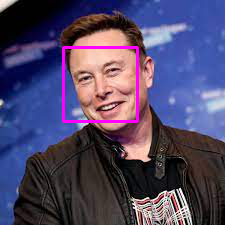

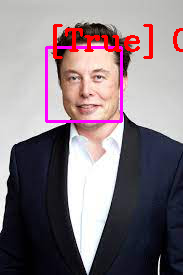

-1

In [ ]:
import cv2
import numpy as np
import face_recognition
#we get the image as BGR format but thr library to work we need to convert it to RGB format

imgElon=face_recognition.load_image_file('/content/gdrive/MyDrive/ImagesBasic/Elon Test.jpg') #imported image
imgElon=cv2.cvtColor(imgElon,cv2.COLOR_BGR2RGB) #This will convert bgr format of img to rgb

#to copy our test image
imgTest=face_recognition.load_image_file('/content/gdrive/MyDrive/ImagesBasic/Elon Musk.jpg') #imported image
imgTest=cv2.cvtColor(imgTest,cv2.COLOR_BGR2RGB) #This will convert bgr format of img to rgb

faceLoc=face_recognition.face_locations(imgElon)[0]
encodeElon=face_recognition.face_encodings(imgElon)[0]
cv2.rectangle(imgElon,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

faceLocTest=face_recognition.face_locations(imgTest)[0]
encodeTest=face_recognition.face_encodings(imgTest)[0]
cv2.rectangle(imgTest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

#at the backend we use linear svm to find out if test and elon match
#we can have almost similar looking images so to reduce the error we will find the distance

results= face_recognition.compare_faces([encodeElon],encodeTest)
faceDis=face_recognition.face_distance([encodeElon],encodeTest)
print(results,faceDis)
cv2.putText(imgTest,f'{results} {round(faceDis[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)


#cv2_imshow('Elon Musk')
cv2_imshow(imgElon)
#cv2_imshow('Elon Test')
cv2_imshow(imgTest)
cv2.waitKey(0)